1.Vấn đề cần xử lý: Làm thế nào để tăng lợi nhuận của siêu thị
-Sản phầm mũi nhọn từng khu vực
-Sản phẩm tiềm năng từng khu vực
-Sản phẩm yếu kém từng khu vực
=> Sản phẩm yếu khem khu vực này có phải là sản phẩm mũi nhọn hoặc tiềm năng khu vực khác không ? 

2.Chuẩn bị dữ liệu

2.1 Load dữ liệu

In [5]:
!pip install kaggle
import kaggle
!kaggle datasets download fatihilhan/global-superstore-dataset -f superstore.csv

Dataset URL: https://www.kaggle.com/datasets/fatihilhan/global-superstore-dataset
License(s): MIT
superstore.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('superstore.csv.zip') 
zip_ref.extractall() # extract file to dir
zip_ref.close() # close file

In [7]:
import pandas as pd
df = pd.read_csv('superstore.csv')

2.2 Làm sạch dữ liệu

In [9]:
df.head(5)

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [11]:
#sửa lại định dạng các cột
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace('.','_')

In [12]:
#xóa cột thừa
df=df.drop(columns=['记录数','shipping_cost','ship_mode','ship_date','segment','customer_id','customer_name','region','product_id','year','market'])

In [13]:
#sủa định dạng ngày
df['order_date']=pd.to_datetime(df['order_date'],format="%Y-%m-%d %H:%M:%S.%f")
df['year']=df['order_date'].dt.year

In [14]:
df.head(n=5)

,category,city,country,discount,order_date,order_id,order_priority,product_name,profit,quantity,row_id,sales,state,sub_category,market2,weeknum,year
0,Office Supplies,Los Angeles,United States,0.0,2011-01-07,CA-2011-130813,High,Xerox 225,9.3312,3,36624,19,California,Paper,North America,2,2011
1,Office Supplies,Los Angeles,United States,0.0,2011-01-21,CA-2011-148614,Medium,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,2,37033,19,California,Paper,North America,4,2011
2,Office Supplies,Los Angeles,United States,0.0,2011-08-05,CA-2011-118962,Medium,"Adams Phone Message Book, Professional, 400 Me...",9.8418,3,31468,21,California,Paper,North America,32,2011
3,Office Supplies,Los Angeles,United States,0.0,2011-08-05,CA-2011-118962,Medium,Xerox 1913,53.2608,2,31469,111,California,Paper,North America,32,2011
4,Office Supplies,Los Angeles,United States,0.0,2011-09-29,CA-2011-146969,High,Xerox 223,3.1104,1,32440,6,California,Paper,North America,40,2011


In [15]:
df.dtypes

category                  object
city                      object
country                   object
discount                 float64
order_date        datetime64[ns]
order_id                  object
order_priority            object
product_name              object
profit                   float64
quantity                   int64
row_id                     int64
sales                      int64
state                     object
sub_category              object
market2                   object
weeknum                    int64
year                       int32
dtype: object

3.Trực quan và phân tích

3.Trực quan và phân tích

3.1 Over view

In [19]:
#thêm thư viện trực quan 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Tổng profit theo khu vực

Text(0.5, 1.0, 'Profit theo khu vực')

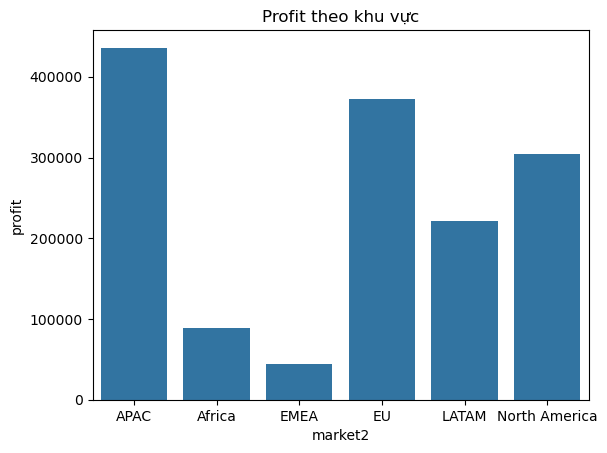

In [21]:
#Hàm tính toán
Total_profit=df.groupby(['market2'])['profit'].sum().reset_index()
#vẽ biểu đồ
sns.barplot(
    x="market2", 
    y="profit",
    data=Total_profit)
plt.title("Profit theo khu vực")

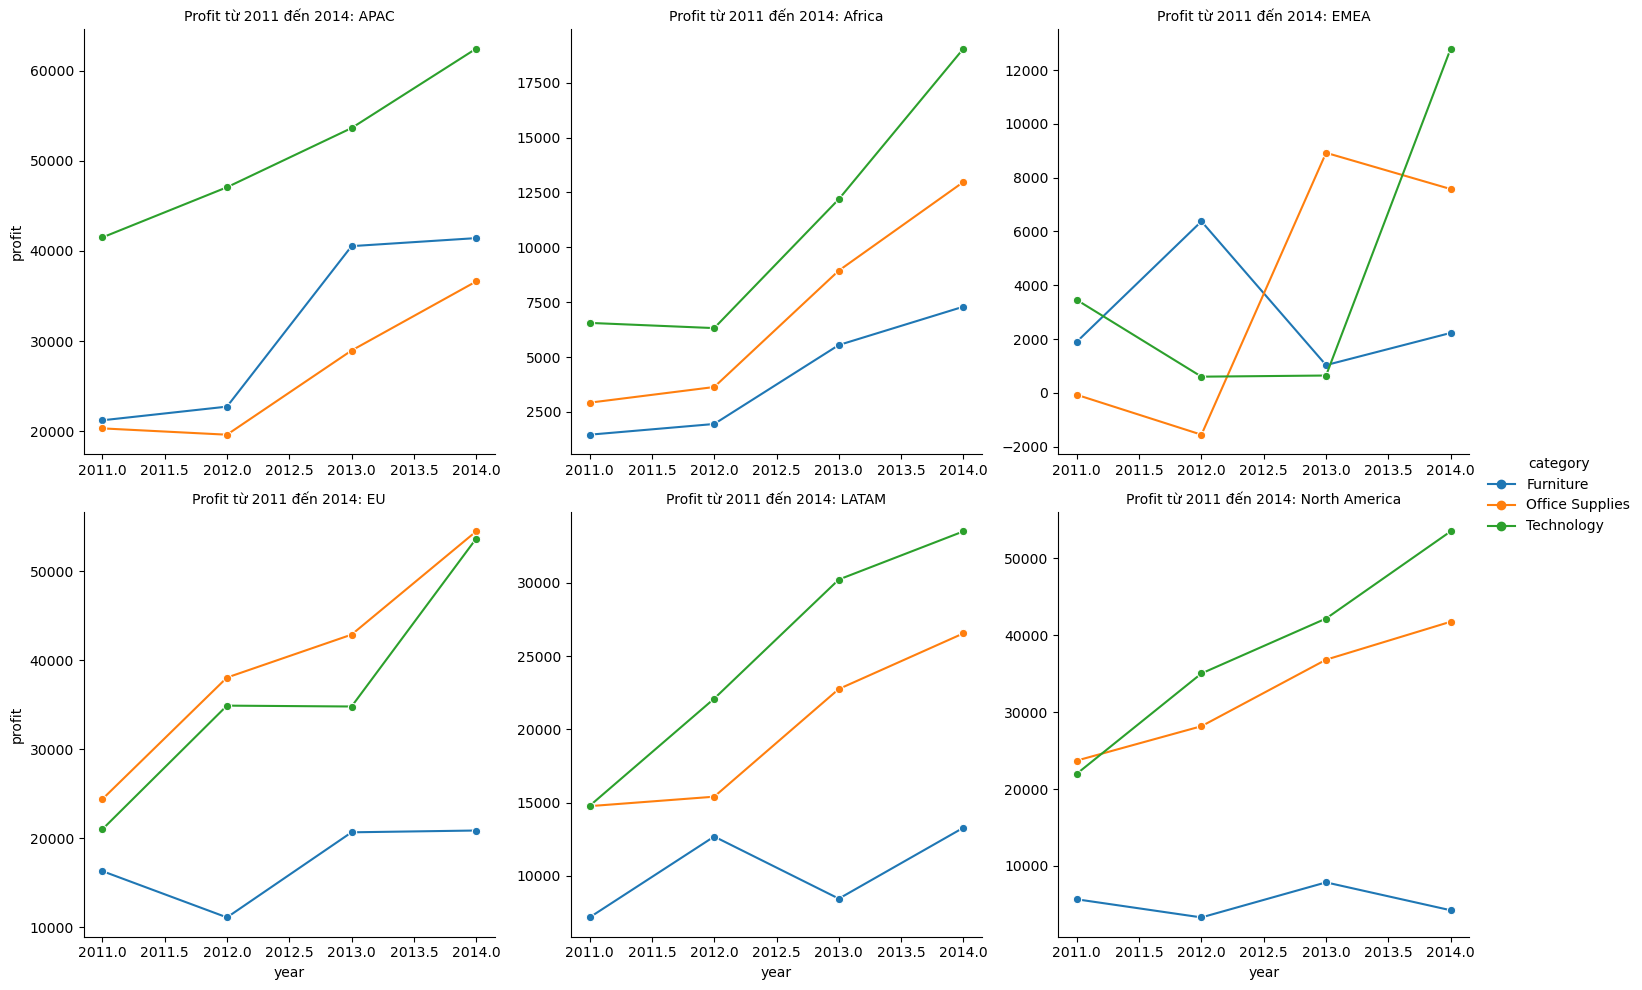

In [22]:
#Hàm tính toán
Total_profit_year=df.groupby(['market2','year','category'])['profit'].sum().reset_index()
#Vẽ biểu đồ
Line_1=sns.relplot(
    data=Total_profit_year, #bảng dữ liệu lấy giá trị
    kind="line", #loại hiển thị
    x="year", # giá trị cột x
    y="profit", #giá trị cột y
    hue='category', #Phân lớp hạng mục
    col="market2", #tách biểu đồ theo market2
    col_wrap=3, # số biểu đồ 1 hàng
    facet_kws={'sharex': False, 'sharey': False}, # không chia sẻ layber
    marker="o", #hiển thị điểm nút
)
Line_1.set_titles("Profit từ 2011 đến 2014: {col_name}") #titles từng bảng theo col


Đánh giá khu vực APAC : 
Đánh giá khu vực Afica :
Đánh giá khu vực EMEA :
Đánh giá khu vực EU : 
Đánh giá khu vực Lamat :
Đánh giá khu vực North America :

3.2 Đánh giá theo khu vực

3.2.1 Khu vực APAC

In [26]:
#dữ liệu riêng APAC
df_APAC=df[df['market2']=='APAC']


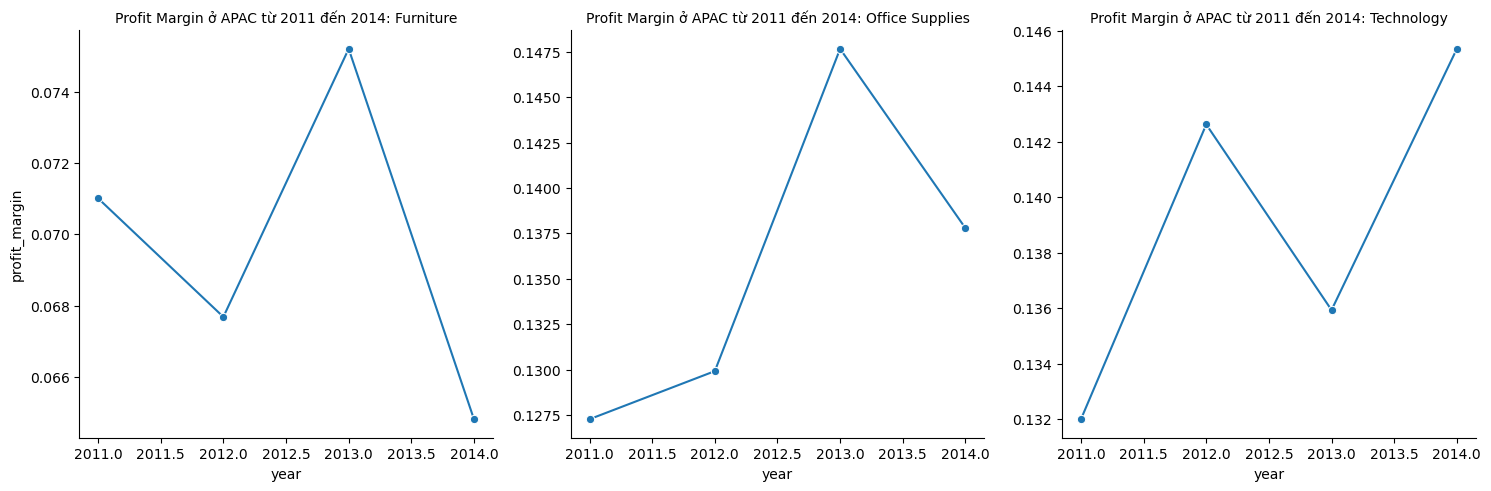

In [27]:
#profit margin qua từng năm
#hàm tính toán
df_APAC_category=df.groupby(['category','year']).sum(['profit','sales'])
df_APAC_category['profit_margin']=df_APAC_category['profit']/df_APAC_category['sales']
#vẽ biểu đồ
line_APAC_category=sns.relplot(
    data=df_APAC_category, #bảng dữ liệu lấy giá trị
    kind="line", #loại hiển thị
    x="year", # giá trị cột x
    y="profit_margin", #giá trị cột y
    col="category", #tách biểu đồ theo market2
    hue=None, #Phân lớp hạng mục
    col_wrap=3, # số biểu đồ 1 hàng
    facet_kws={'sharex': False, 'sharey': False}, # không chia sẻ layber
    marker="o" #hiển thị điểm nút
)
line_APAC_category.set_titles("Profit Margin ở APAC từ 2011 đến 2014: {col_name}") #titles từng bảng theo col

Nhận xét 

3.2.1.1 Khu vực APAC ( Furniture )

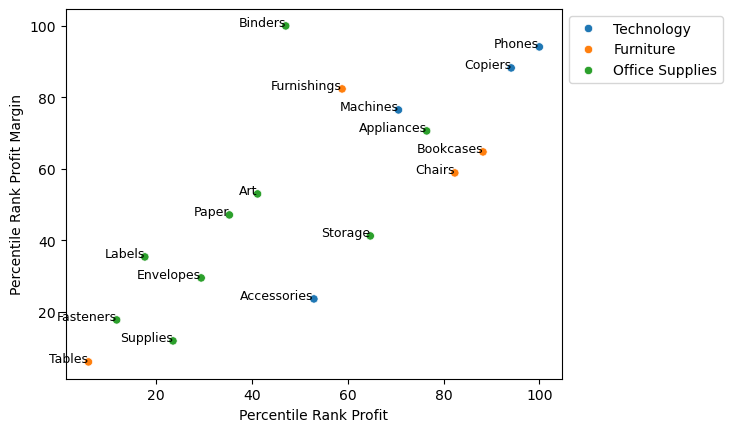

In [30]:
# hàm tính toán (phân loại sản phẩm)
APAC_table=df_APAC.groupby(['sub_category','category'])[['profit','sales']].sum().reset_index()
APAC_table['profit_margin']=APAC_table['profit']/APAC_table['sales']
APAC_table_sorted = APAC_table.sort_values(by='profit', ascending=False)
APAC_table_sorted = APAC_table_sorted.drop(columns=['sales'])
APAC_table_sorted['percentile_rank_profit'] = APAC_table_sorted['profit'].rank(pct=True) * 100
APAC_table_sorted['percentile_rank_margin'] = APAC_table_sorted['profit_margin'].rank(pct=True) * 100
df_APAC_table_sorted=pd.DataFrame(APAC_table_sorted)
# hàm vẽ biều đồ
x = df_APAC_table_sorted["percentile_rank_profit"]
y = df_APAC_table_sorted["percentile_rank_margin"]
c = df_APAC_table_sorted["sub_category"]
z = df_APAC_table_sorted["category"]
sns.scatterplot(x=x, y=y,hue=z, alpha=1);
# Thêm giá trị của 'sub_category' vào từng điểm
for i in range(len(x)):
    plt.text(x[i], y[i], c[i], fontsize=9, ha='right')
#phân loại
#Gắn nhãn cho các trục
plt.xlabel('Percentile Rank Profit')
plt.ylabel('Percentile Rank Profit Margin')
plt.legend(bbox_to_anchor=(1, 1))

In [31]:
#Danh sách sản phẩm bên APAC
List_APAC_mui_nhon={'Phones','Copiers'} #percentile_rank_profit >80 và percentile_rank_margin >80
List_APAC_tiem_nang={} #percentile_rank_profit < 40 và percentile_rank_margin > 80
List_APAC_yeu_kem={'Tables','Supplies','Fasteners'} #percentile_rank_profit <20 và percentile_rank_margin <40
data = {
    'mui_nhon': pd.Series(list(List_APAC_mui_nhon)),
    'tiem_nang': pd.Series(list(List_APAC_tiem_nang)),
    'yeu_kem': pd.Series(list(List_APAC_yeu_kem)),
    'khu_vuc': 'EMEA'  # Cột chỉ có giá trị là "EU"
}
# Tạo DataFrame từ từ điển
df_APAC = pd.DataFrame(data)
print(df_APAC)

  mui_nhon tiem_nang    yeu_kem khu_vuc
0   Phones       NaN   Supplies    EMEA
1  Copiers       NaN     Tables    EMEA
2      NaN       NaN  Fasteners    EMEA


3.2.2 Khu vực Afica

In [33]:
#dữ liệu riêng Africa
df_Africa=df[df['market2']=='Africa']


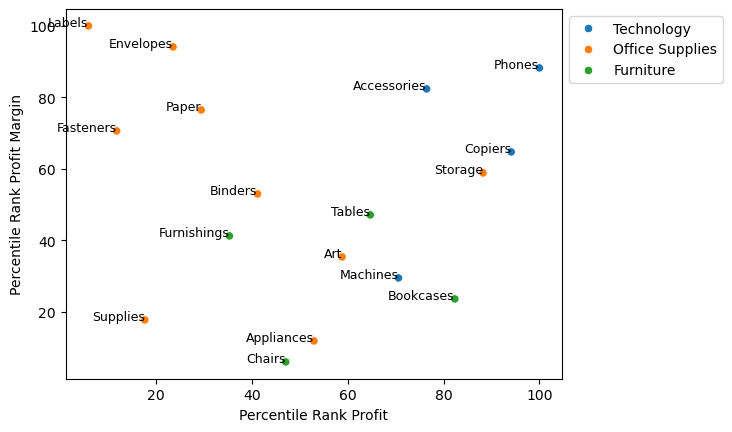

In [34]:
# phân loại sản phẩm
Africa_table=df_Africa.groupby(['sub_category','category'])[['profit','sales']].sum().reset_index()
Africa_table['profit_margin']=Africa_table['profit']/Africa_table['sales']
Africa_table_sorted = Africa_table.sort_values(by='profit', ascending=False)
Africa_table_sorted = Africa_table_sorted.drop(columns=['sales'])
Africa_table_sorted['percentile_rank_profit'] = Africa_table_sorted['profit'].rank(pct=True) * 100
Africa_table_sorted['percentile_rank_margin'] = Africa_table_sorted['profit_margin'].rank(pct=True) * 100
df_Africa_table_sorted=pd.DataFrame(Africa_table_sorted)
df_Africa_table_sorted
# hàm vẽ biều đồ
x = df_Africa_table_sorted["percentile_rank_profit"]
y = df_Africa_table_sorted["percentile_rank_margin"]
c = df_Africa_table_sorted["sub_category"]
z = df_Africa_table_sorted["category"]
sns.scatterplot(x=x, y=y,hue=z, alpha=1)
# Thêm giá trị của 'sub_category' vào từng điểm
for i in range(len(x)):
    plt.text(x[i], y[i], c[i], fontsize=9, ha='right')
#phân loại
#Gắn nhãn cho các trục
plt.xlabel('Percentile Rank Profit')
plt.ylabel('Percentile Rank Profit Margin')
plt.legend(bbox_to_anchor=(1, 1))

In [35]:
#Danh sách sản phẩm bên Africa
List_Africa_mui_nhon={'Phones'} #percentile_rank_profit >80 và percentile_rank_margin >80
List_Africa_tiem_nang={'Labels','Envelopes'} #percentile_rank_profit < 40 và percentile_rank_margin > 80
List_Africa_yeu_kem={'Supplies'} #percentile_rank_profit <20 và percentile_rank_margin <20
data = {
    'mui_nhon': pd.Series(list(List_Africa_mui_nhon)),
    'tiem_nang': pd.Series(list(List_Africa_tiem_nang)),
    'yeu_kem': pd.Series(list(List_Africa_yeu_kem)),
    'khu_vuc': 'Africa'  # Cột chỉ có giá trị là "EU"
}
# Tạo DataFrame từ từ điển
df_Africa = pd.DataFrame(data)
print(df_Africa)

  mui_nhon  tiem_nang   yeu_kem khu_vuc
0   Phones  Envelopes  Supplies  Africa
1      NaN     Labels       NaN  Africa


3.2.3 Khu vực EMEA

In [37]:
df_EMEA=df[df['market2']=='EMEA']


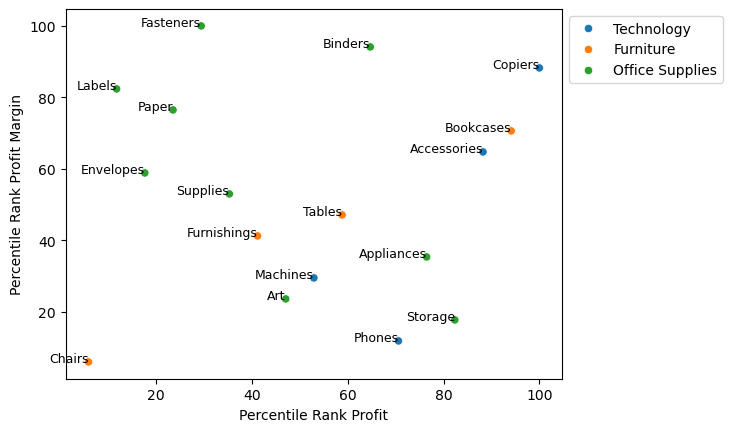

In [38]:
# phân loại sản phẩm
EMEA_table=df_EMEA.groupby(['sub_category','category'])[['profit','sales']].sum().reset_index()
EMEA_table['profit_margin']=EMEA_table['profit']/EMEA_table['sales']
EMEA_table_sorted = EMEA_table.sort_values(by='profit', ascending=False)
EMEA_table_sorted = EMEA_table_sorted.drop(columns=['sales'])
EMEA_table_sorted['percentile_rank_profit'] = EMEA_table_sorted['profit'].rank(pct=True) * 100
EMEA_table_sorted['percentile_rank_margin'] = EMEA_table_sorted['profit_margin'].rank(pct=True) * 100
df_EMEA_table_sorted=pd.DataFrame(EMEA_table_sorted)
df_EMEA_table_sorted
# hàm vẽ biều đồ
x = df_EMEA_table_sorted["percentile_rank_profit"]
y = df_EMEA_table_sorted["percentile_rank_margin"]
c = df_EMEA_table_sorted["sub_category"]
z = df_EMEA_table_sorted["category"]
sns.scatterplot(x=x, y=y,hue=z, alpha=1)
# Thêm giá trị của 'sub_category' vào từng điểm
for i in range(len(x)):
    plt.text(x[i], y[i], c[i], fontsize=9, ha='right')
#phân loại
#Gắn nhãn cho các trục
plt.xlabel('Percentile Rank Profit')
plt.ylabel('Percentile Rank Profit Margin')
plt.legend(bbox_to_anchor=(1, 1))

In [39]:
#Danh sách sản phẩm bên EMEA
List_EMEA_mui_nhon={'Copiers'} #percentile_rank_profit >80 và percentile_rank_margin >80
List_EMEA_tiem_nang={'Fasteners','Labels'} #percentile_rank_profit < 40 và percentile_rank_margin > 80
List_EMEA_yeu_kem={'Chairs'} #percentile_rank_profit <20 và percentile_rank_margin <20
data = {
    'mui_nhon': pd.Series(list(List_EMEA_mui_nhon)),
    'tiem_nang': pd.Series(list(List_EMEA_tiem_nang)),
    'yeu_kem': pd.Series(list(List_EMEA_yeu_kem)),
    'khu_vuc': 'EMEA'  # Cột chỉ có giá trị là "EU"
}
# Tạo DataFrame từ từ điển
df_EMEA = pd.DataFrame(data)
print(df_EMEA)

  mui_nhon  tiem_nang yeu_kem khu_vuc
0  Copiers  Fasteners  Chairs    EMEA
1      NaN     Labels     NaN    EMEA


3.2.4 Khu vực EU

In [41]:
df_EU=df[df['market2']=='EU']


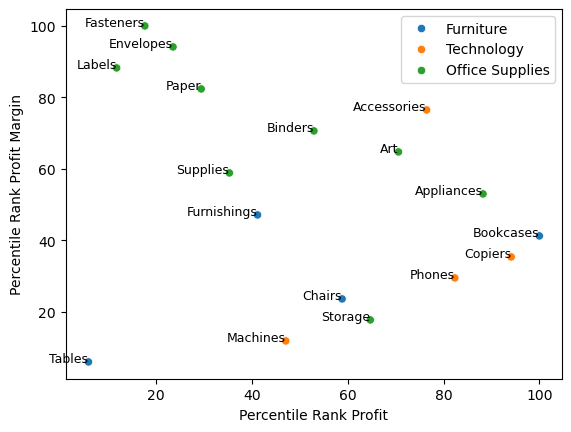

In [42]:
# phân loại sản phẩm
EU_table=df_EU.groupby(['sub_category','category'])[['profit','sales']].sum().reset_index()
EU_table['profit_margin']=EU_table['profit']/EU_table['sales']
EU_table_sorted = EU_table.sort_values(by='profit', ascending=False)
EU_table_sorted = EU_table_sorted.drop(columns=['sales'])
EU_table_sorted['percentile_rank_profit'] = EU_table_sorted['profit'].rank(pct=True) * 100
EU_table_sorted['percentile_rank_margin'] = EU_table_sorted['profit_margin'].rank(pct=True) * 100
df_EU_table_sorted=pd.DataFrame(EU_table_sorted)
df_EU_table_sorted
# hàm vẽ biều đồ
x = df_EU_table_sorted["percentile_rank_profit"]
y = df_EU_table_sorted["percentile_rank_margin"]
c = df_EU_table_sorted["sub_category"]
z = df_EU_table_sorted["category"]
sns.scatterplot(x=x, y=y,hue=z, alpha=1)
# Thêm giá trị của 'sub_category' vào từng điểm
for i in range(len(x)):
    plt.text(x[i], y[i], c[i], fontsize=9, ha='right')
#phân loại
#Gắn nhãn cho các trục
plt.xlabel('Percentile Rank Profit')
plt.ylabel('Percentile Rank Profit Margin')
plt.legend(bbox_to_anchor=(1, 1))

In [43]:
#Danh sách sản phẩm bên EU
List_EU_mui_nhon={} #percentile_rank_profit >80 và percentile_rank_margin >80
List_EU_tiem_nang={'Fasteners','Labels','Envelopes','Paper'} #percentile_rank_profit < 40 và percentile_rank_margin > 80
List_EU_yeu_kem={'Tables'} #percentile_rank_profit <20 và percentile_rank_margin <20
data = {
    'mui_nhon': pd.Series(list(List_EU_mui_nhon)),
    'tiem_nang': pd.Series(list(List_EU_tiem_nang)),
    'yeu_kem': pd.Series(list(List_EU_yeu_kem)),
    'khu_vuc': 'EU'  # Cột chỉ có giá trị là "EU"
}
# Tạo DataFrame từ từ điển
df_EU = pd.DataFrame(data)
print(df_EU)

  mui_nhon  tiem_nang yeu_kem khu_vuc
0      NaN      Paper  Tables      EU
1      NaN  Envelopes     NaN      EU
2      NaN  Fasteners     NaN      EU
3      NaN     Labels     NaN      EU


3.2.5 Khu vực LATAM

In [45]:
df_LATAM=df[df['market2']=='LATAM']


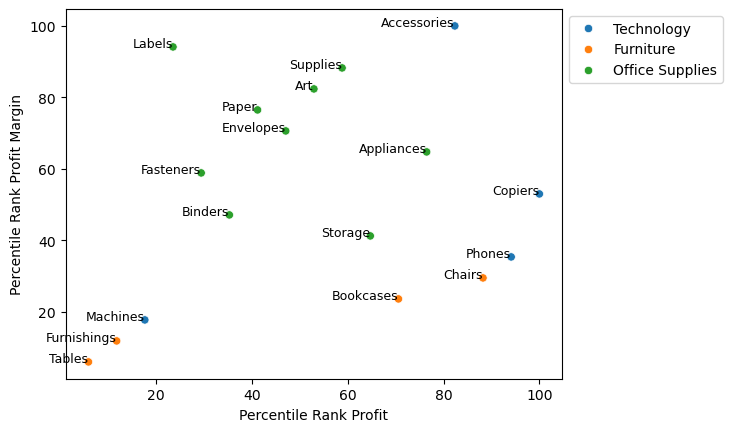

In [46]:
# phân loại sản phẩm
LATAM_table=df_LATAM.groupby(['sub_category','category'])[['profit','sales']].sum().reset_index()
LATAM_table['profit_margin']=LATAM_table['profit']/LATAM_table['sales']
LATAM_table_sorted = LATAM_table.sort_values(by='profit', ascending=False)
LATAM_table_sorted = LATAM_table_sorted.drop(columns=['sales'])
LATAM_table_sorted['percentile_rank_profit'] = LATAM_table_sorted['profit'].rank(pct=True) * 100
LATAM_table_sorted['percentile_rank_margin'] = LATAM_table_sorted['profit_margin'].rank(pct=True) * 100
df_LATAM_table_sorted=pd.DataFrame(LATAM_table_sorted)
df_LATAM_table_sorted
# hàm vẽ biều đồ
x = df_LATAM_table_sorted["percentile_rank_profit"]
y = df_LATAM_table_sorted["percentile_rank_margin"]
c = df_LATAM_table_sorted["sub_category"]
z = df_LATAM_table_sorted["category"]
sns.scatterplot(x=x, y=y,hue=z, alpha=1)
# Thêm giá trị của 'sub_category' vào từng điểm
for i in range(len(x)):
    plt.text(x[i], y[i], c[i], fontsize=9, ha='right')
#phân loại
#Gắn nhãn cho các trục
plt.xlabel('Percentile Rank Profit')
plt.ylabel('Percentile Rank Profit Margin')
plt.legend(bbox_to_anchor=(1, 1))

In [47]:
#Danh sách sản phẩm bên LATAM
List_LATAM_mui_nhon={'Accessories'} #percentile_rank_profit >80 và percentile_rank_margin >80
List_LATAM_tiem_nang={'Labels'} #percentile_rank_profit < 40 và percentile_rank_margin > 80
List_LATAM_yeu_kem={'Tables','Furnishings','Machines'} #percentile_rank_profit <20 và percentile_rank_margin <20
data = {
    'mui_nhon': pd.Series(list(List_LATAM_mui_nhon)),
    'tiem_nang': pd.Series(list(List_LATAM_tiem_nang)),
    'yeu_kem': pd.Series(list(List_LATAM_yeu_kem)),
    'khu_vuc': 'LATAM'  # Cột chỉ có giá trị là "EU"
}
# Tạo DataFrame từ từ điển
df_LATAM = pd.DataFrame(data)
print(df_LATAM)

      mui_nhon tiem_nang      yeu_kem khu_vuc
0  Accessories    Labels       Tables   LATAM
1          NaN       NaN     Machines   LATAM
2          NaN       NaN  Furnishings   LATAM


3.2.6 Khu vực North America

In [49]:
df_NA=df[df['market2']=='North America']


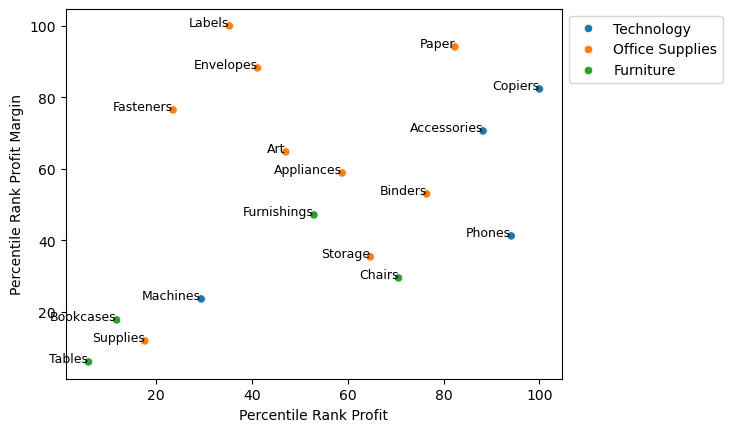

In [50]:
# phân loại sản phẩm
NA_table=df_NA.groupby(['sub_category','category'])[['profit','sales']].sum().reset_index()
NA_table['profit_margin']=NA_table['profit']/NA_table['sales']
NA_table_sorted = NA_table.sort_values(by='profit', ascending=False)
NA_table_sorted = NA_table_sorted.drop(columns=['sales'])
NA_table_sorted['percentile_rank_profit'] = NA_table_sorted['profit'].rank(pct=True) * 100
NA_table_sorted['percentile_rank_margin'] = NA_table_sorted['profit_margin'].rank(pct=True) * 100
df_NA_table_sorted=pd.DataFrame(NA_table_sorted)
df_NA_table_sorted
# hàm vẽ biều đồ
x = df_NA_table_sorted["percentile_rank_profit"]
y = df_NA_table_sorted["percentile_rank_margin"]
c = df_NA_table_sorted["sub_category"]
z = df_NA_table_sorted["category"]
sns.scatterplot(x=x, y=y,hue=z, alpha=1)
# Thêm giá trị của 'sub_category' vào từng điểm
for i in range(len(x)):
    plt.text(x[i], y[i], c[i], fontsize=9, ha='right')
#phân loại
#Gắn nhãn cho các trục
plt.xlabel('Percentile Rank Profit')
plt.ylabel('Percentile Rank Profit Margin')
plt.legend(bbox_to_anchor=(1, 1))

In [51]:
#Danh sách sản phẩm bên EU
List_NA_mui_nhon={'Paper','Copiers'} #percentile_rank_profit >80 và percentile_rank_margin >80
List_NA_tiem_nang={'Labels'} #percentile_rank_profit < 40 và percentile_rank_margin > 80
List_NA_yeu_kem={'Tables','Bookcases','Supplies'} #percentile_rank_profit <20 và percentile_rank_margin <20
data = {
    'mui_nhon': pd.Series(list(List_NA_mui_nhon)),
    'tiem_nang': pd.Series(list(List_NA_tiem_nang)),
    'yeu_kem': pd.Series(list(List_NA_yeu_kem)),
    'khu_vuc': 'NA'  # Cột chỉ có giá trị là "EU"
}
# Tạo DataFrame từ từ điển
df_NA = pd.DataFrame(data)
print(df_NA)

  mui_nhon tiem_nang    yeu_kem khu_vuc
0    Paper    Labels   Supplies      NA
1  Copiers       NaN     Tables      NA
2      NaN       NaN  Bookcases      NA


4. Kết luận

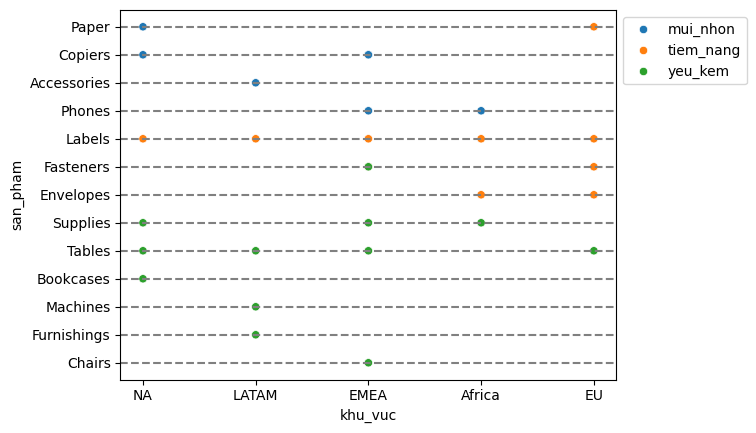

In [53]:
#So sánh sản phẩm tại các khu vực
df_list_full = pd.concat([df_NA,df_LATAM,df_EMEA,df_EU,df_Africa,df_APAC])
df_melted = pd.melt(df_list_full, id_vars='khu_vuc', value_vars=['mui_nhon', 'tiem_nang', 'yeu_kem'], 
                    var_name='loai', value_name='san_pham')
df_melted = df_melted.dropna(subset=['san_pham'])
#vẽ biểu đồ
sns.scatterplot(data=df_melted,x='khu_vuc',y='san_pham',hue='loai')
for x in range(13):
    plt.axhline(y=x, color='gray', linestyle='--')
plt.legend(bbox_to_anchor=(1, 1))

Đề xuất xử lý để tăng doanh thu

In [55]:
#sản phẩm yếu kém
#-Sản phẩm yếu kém 'Fasteners' ở khu vực APAC có thể chuyển qua 2 khu vực EU và EMEA để tiêu thụ
#-Sản phẩm 'Tables' là sản phẩm yếu kém ở hầu hết các khu vực, cần hạn chế nhập hàng mới
#-Sản phẩm 'Supplies' chưa tìm được khu vực sản phẩm này là tiềm năng và mũi nhọn. Đề xuất khu vực có lợi nhuận cao nhất là :
#-Sản phẩm 'Bookcases' chưa tìm được khu vực sản phẩm này là tiềm năng và mũi nhọn. Đề xuất khu vực có lợi nhuận cao nhất là :
#-Sản phẩm 'Furnishings' chưa tìm được khu vực sản phẩm này là tiềm năng và mũi nhọn. Đề xuất khu vực có lợi nhuận cao nhất là :
#-Sản phẩm 'Machines' chưa tìm được khu vực sản phẩm này là tiềm năng và mũi nhọn. Đề xuất khu vực có lợi nhuận cao nhất là :
#-Sản phẩm 'Chairs' chưa tìm được khu vực sản phẩm này là tiềm năng và mũi nhọn. Đề xuất khu vực có lợi nhuận cao nhất là :
###sản phẩm tiềm năng
#tăng cường marketing, chương trình giảm giá 10%=>20% ( tùy thuộc vào profit margin ) để kích thích doanh thu => tạo lợi nhuận lớn
#sản phẩm "paper" từ khu vực EU khi có dấu hiệu giảm doanh thu có thể nghĩ đến việc chuyển hàng tồn sang NA để tiêu thụ
###Sản phẩm mũi nhọn
#labels đang là xu thế, thử khai thác ở khu vực APAC
#cần duy trì và phát huy doanh số của các doanh số này